In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import fixed
from ipywidgets import widgets

Karkkainen, K., & Joo, J. (2021). FairFace: Face Attribute Dataset for Balanced Race, Gender, and Age for Bias Measurement and Mitigation. In Proceedings of the IEEE/CVF Winter Conference on Applications of Computer Vision (pp. 1548-1558).

* https://github.com/joojs/fairface
* Image sizes are (224 x 224 x 3)

In [2]:
DATA_DIR = "/notebooks/data/fairface"
TRAIN_LABELS = "fairface_label_train.csv"
VAL_LABELS = "fairface_label_val.csv"

In [3]:
train_df = pd.read_csv("{}/{}".format(DATA_DIR,TRAIN_LABELS))

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          86744 non-null  object
 1   age           86744 non-null  object
 2   gender        86744 non-null  object
 3   race          86744 non-null  object
 4   service_test  86744 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 2.7+ MB


In [5]:
train_df['file'] = train_df['file'].apply(lambda x: "{}/{}".format(DATA_DIR, x))

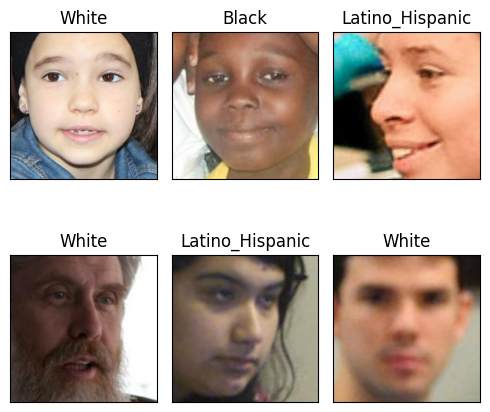

In [6]:
# Visualize random images from the dataset 
random_index = np.random.randint(0, len(train_df), 16)
fig, axes = plt.subplots(
    nrows=2, 
    ncols=3, 
    figsize=(5, 5),
    subplot_kw={'xticks': [], 'yticks': []}
)

for i, ax in enumerate(axes.flat):
    img = plt.imread(train_df.file[random_index[i]])
    ax.imshow(img)
    ax.set_title(train_df.race[random_index[i]])
plt.tight_layout()
plt.show()

In [7]:
def check_images(image_df, image_index):
    plt.figure(figsize=(2,2))
    # fig, axes = plt.subplots(
    #     nrows=2, 
    #     ncols=3, 
    #     figsize=(5, 5),
    #     subplot_kw={'xticks': [], 'yticks': []}
    # )

    # for i, ax in enumerate(axes.flat):
    img = plt.imread(image_df.file[image_index])
    plt.imshow(img)
    print(img.shape)
    plt.title("{}_{}".format(image_df.race[image_index], image_df.age[image_index]))
    plt.tight_layout()

widgets.interact(check_images,image_index=(0,len(train_df)-1,1), image_df=fixed(train_df), __manual=True)

interactive(children=(IntSlider(value=43371, description='image_index', max=86743), Output()), _dom_classes=('…

<function __main__.check_images(image_df, image_index)>

<Axes: xlabel='age'>

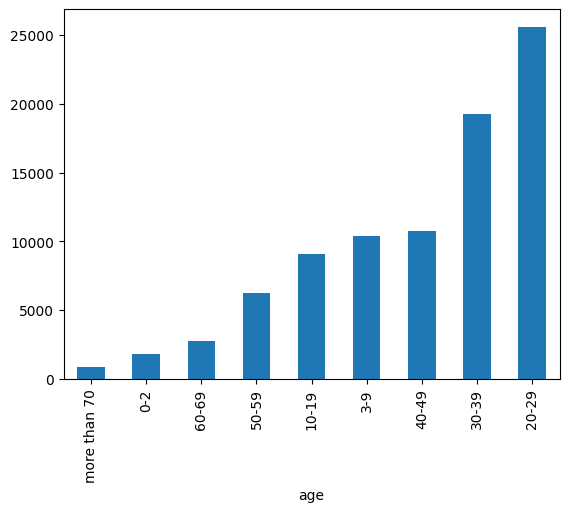

In [8]:
train_df.age.value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='race'>

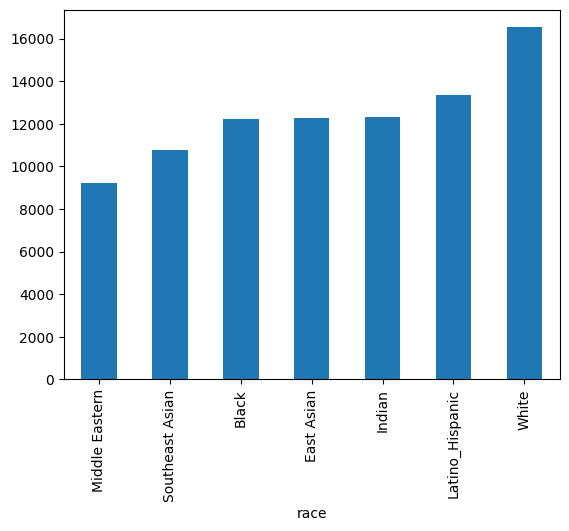

In [9]:
train_df.race.value_counts().sort_values().plot(kind='bar')

In [10]:
binary_race_df = train_df.copy()

In [11]:
binary_race_df = binary_race_df[~binary_race_df['race'].isin(['Latino_Hispanic','Southeast Asian', 'Middle Eastern'])]

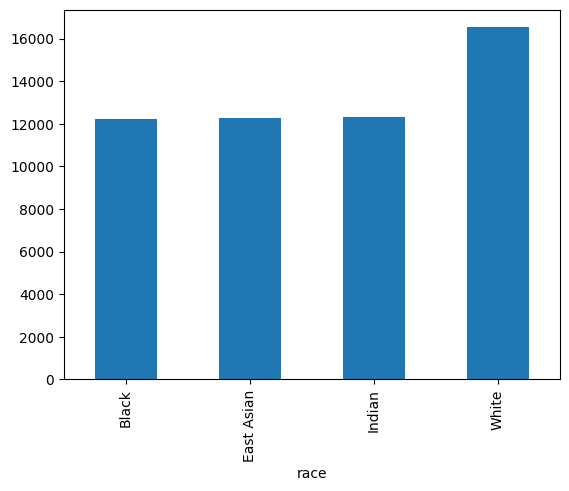

In [14]:
binary_race_df.race.value_counts().sort_values().plot(kind='bar')
plt.savefig("./output_images/fairFaceOriginalDistribution.png", bbox_inches='tight')

In [15]:
binary_race_df['binary_race'] = binary_race_df.apply(
    lambda row: 'light' if row.race in ('White','East Asian') else 'dark', axis=1
)

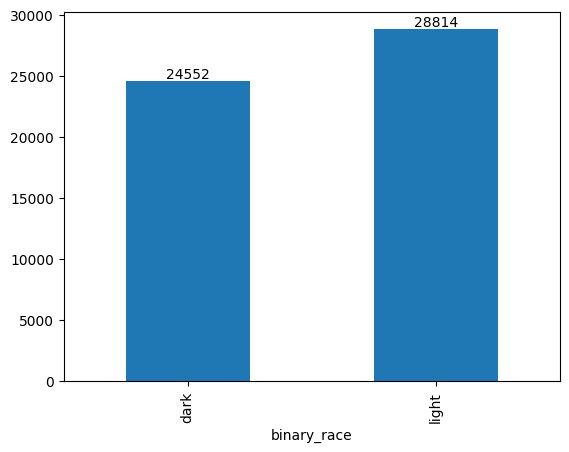

In [16]:
ax = binary_race_df.binary_race.value_counts().sort_values().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.savefig("./output_images/RegroupDistributionFairFace.png", bbox_inches='tight')

In [17]:
binary_race_df.drop(
    columns=['age', 'gender', 'race', 'service_test'], 
    axis=1, 
    inplace=True
)